<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/search_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [6]:
# Sampled

In [2]:
url = '../../data/BtoA&D/oversampled_text_wend.csv'
sampled_text_week = pd.read_csv(url)

X_s = sampled_text_week.copy()
del X_s['tran_week']
del X_s['text_wend']


y_s = sampled_text_week['text_wend']
y_s.value_counts() 

0    2248
1    2248
2    2248
3    2248
Name: text_wend, dtype: int64

In [3]:
sample_random_guess = 1 / 4

In [4]:
print(X_s)
print(y_s)

      tran_wend
0             1
1             0
2             0
3             1
4             0
...         ...
8987          0
8988          0
8989          1
8990          1
8991          1

[8992 rows x 1 columns]
0       2
1       0
2       1
3       1
4       2
       ..
8987    2
8988    3
8989    2
8990    3
8991    0
Name: text_wend, Length: 8992, dtype: int64


They converge but the error is very high. It seems like LR cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they highly fluctuate.

# 2. sampled

# SVM 

## Seed 100

In [5]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [6]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 1.0, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.27724240177909565
F1 score micro: 0.27724240177909565

classification report:
               precision    recall  f1-score   support

           0       0.27      0.68      0.39       663
           1       0.00      0.00      0.00       694
           2       0.29      0.44      0.35       670
           3       0.00      0.00      0.00       671

    accuracy                           0.28      2698
   macro avg       0.14      0.28      0.18      2698
weighted avg       0.14      0.28      0.18      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished


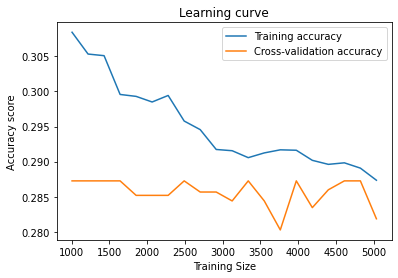

In [7]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='linear', C=1.0, gamma=0.0001)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [8]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [9]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.2587101556708673
F1 score micro: 0.2587101556708673

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       696
           1       0.25      0.68      0.36       628
           2       0.00      0.00      0.00       698
           3       0.28      0.40      0.33       676

    accuracy                           0.26      2698
   macro avg       0.13      0.27      0.17      2698
weighted avg       0.13      0.26      0.17      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished


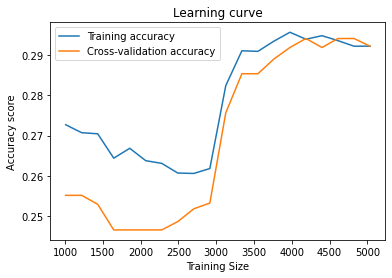

In [10]:
plot_model = svm.SVC(kernel='linear', C=0.01, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [11]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [12]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.27390659747961454
F1 score micro: 0.27390659747961454

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       687
           1       0.27      0.69      0.39       671
           2       0.00      0.00      0.00       702
           3       0.27      0.44      0.34       638

    accuracy                           0.27      2698
   macro avg       0.14      0.28      0.18      2698
weighted avg       0.13      0.27      0.18      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished


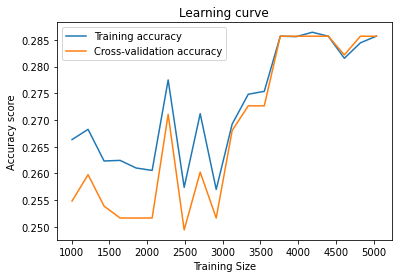

In [13]:
plot_model = svm.SVC(kernel='linear', C=0.01, gamma=0.0001)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [67]:
# learning curve considering different seeds 

In [14]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

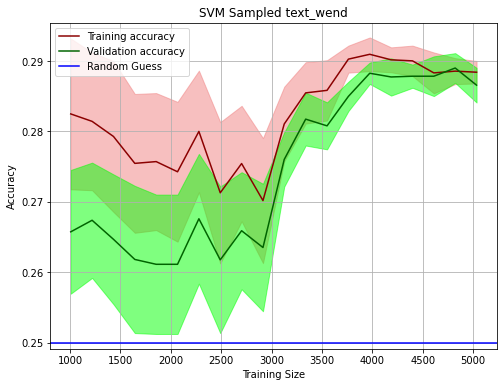

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Sampled text_wend')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Seems like the learning is very unstable due to low training size.

# Logistic Regression

## Seed 100

In [16]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [17]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.01, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.27724240177909565
F1 score micro: 0.27724240177909565

classification report:
               precision    recall  f1-score   support

           0       0.27      0.68      0.39       663
           1       0.00      0.00      0.00       694
           2       0.29      0.44      0.35       670
           3       0.00      0.00      0.00       671

    accuracy                           0.28      2698
   macro avg       0.14      0.28      0.18      2698
weighted avg       0.14      0.28      0.18      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.25182678        nan 0.24674149 0.25675638
 0.25675638 0.26422262 0.25675638 0.25675638        nan        nan
        nan        nan        nan 0.28423611 0.28423611        nan
 0.28423611 0.28423611        nan        nan 0.25182678        nan
 0.25627792 0.25675638 0.25675638 0.26422262 0.25675638 0.25675638
        nan        nan        nan        nan        nan 0.28423611
 0.28423611        nan 0.28439496 0.28423611        nan        nan
        nan        nan 0.24753767 0.25675638 0.25675638        nan
 0.25675638 0.25675638        nan        nan        nan        nan
        nan 0.28423611 0.28423611        nan 0.28423611 0.28423611
        nan        nan 0.2397527         nan 0.25103149 0.27883739
 0.27883739 0.27883739 0.27883739 0.27883739        nan        nan
        nan        n

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


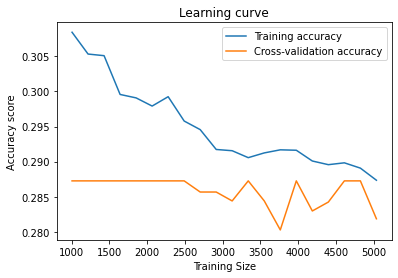

In [18]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.01, multi_class='auto', penalty='l2', solver='newton-cg')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [19]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [20]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.001, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.2587101556708673
F1 score micro: 0.2587101556708673

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       696
           1       0.25      0.68      0.36       628
           2       0.00      0.00      0.00       698
           3       0.28      0.40      0.33       676

    accuracy                           0.26      2698
   macro avg       0.13      0.27      0.17      2698
weighted avg       0.13      0.26      0.17      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.24658289        nan 0.25452747 0.25738688
 0.25738688 0.28821282 0.25738688 0.25738688        nan        nan
        nan        nan        nan 0.28725892 0.28725892        nan
 0.28725892 0.28725892        nan        nan 0.24658289        nan
 0.2589767  0.25738688 0.25738688 0.28821282 0.25738688 0.25738688
        nan        nan        nan        nan        nan 0.28725892
 0.28725892        nan 0.28725892 0.28725892        nan        nan
        nan        nan 0.25071517 0.25738688 0.25738688        nan
 0.25738688 0.25738688        nan        nan        nan        nan
        nan 0.28725892 0.28725892        nan 0.28725892 0.28725892
        nan        nan 0.25738688        nan 0.24213668 0.28821282
 0.28821282 0.28821282 0.28821282 0.28821282        nan        nan
        nan        n

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


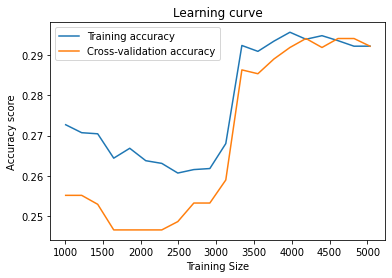

In [21]:
plot_model = LogisticRegression(C=0.001, multi_class='ovr', penalty='l2', solver='newton-cg')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [22]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [23]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.27390659747961454
F1 score micro: 0.27390659747961454

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       687
           1       0.27      0.69      0.39       671
           2       0.00      0.00      0.00       702
           3       0.27      0.44      0.34       638

    accuracy                           0.27      2698
   macro avg       0.14      0.28      0.18      2698
weighted avg       0.13      0.27      0.18      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.24801373        nan 0.25230285 0.2637405
 0.2637405  0.2637405  0.2637405  0.2637405         nan        nan
        nan        nan        nan 0.27057561 0.27057561        nan
 0.27057561 0.27057561        nan        nan 0.24801373        nan
 0.24896964 0.26183422 0.26183422 0.2637405  0.26183422 0.26183422
        nan        nan        nan        nan        nan 0.27057561
 0.27057561        nan 0.27057561 0.27057561        nan        nan
        nan        nan 0.24658352 0.2637405  0.2637405         nan
 0.2637405  0.2637405         nan        nan        nan        nan
        nan 0.27057561 0.27057561        nan 0.27057561 0.27057561
        nan        nan 0.25579768        nan 0.24451839 0.27311731
 0.27311731 0.27311731 0.27311731 0.27311731        nan        nan
        nan        na

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


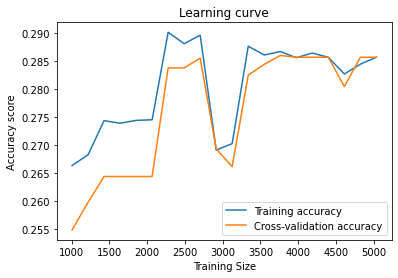

In [24]:
plot_model = LogisticRegression(C=0.001, multi_class='auto', penalty='l2', solver='newton-cg')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [79]:
# learning curve considering different seeds 

In [25]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

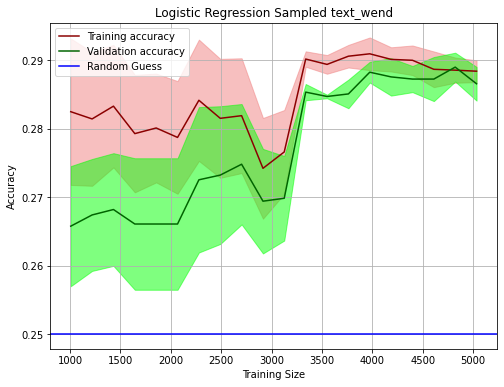

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Sampled text_wend')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Seems like the learning is very unstable due to low training size.

# KNN

## Seed 100

In [27]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [28]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'n_neighbors': 39, 'weights': 'uniform'}
Accuracy: 0.28799110452186805
F1 score micro: 0.28799110452186805

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       663
           1       0.29      0.70      0.41       694
           2       0.00      0.00      0.00       670
           3       0.29      0.44      0.35       671

    accuracy                           0.29      2698
   macro avg       0.14      0.28      0.19      2698
weighted avg       0.15      0.29      0.19      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished


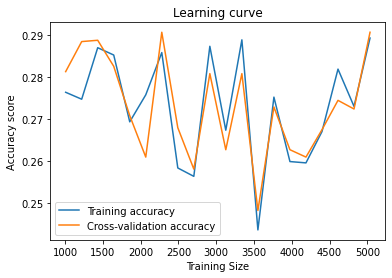

In [31]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=39)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [32]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [33]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 28, 'weights': 'uniform'}
Accuracy: 0.2587101556708673
F1 score micro: 0.2587101556708673

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       696
           1       0.25      0.68      0.36       628
           2       0.00      0.00      0.00       698
           3       0.28      0.40      0.33       676

    accuracy                           0.26      2698
   macro avg       0.13      0.27      0.17      2698
weighted avg       0.13      0.26      0.17      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished


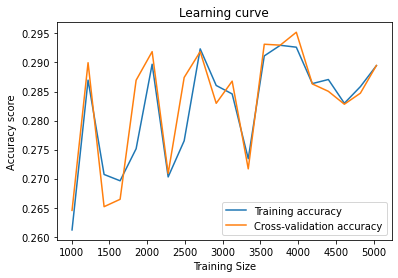

In [34]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='uniform', n_neighbors=28)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [35]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [36]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'n_neighbors': 44, 'weights': 'uniform'}
Accuracy: 0.2954040029651594
F1 score micro: 0.2954040029651594

classification report:
               precision    recall  f1-score   support

           0       0.28      0.69      0.40       687
           1       0.00      0.00      0.00       671
           2       0.31      0.46      0.37       702
           3       0.00      0.00      0.00       638

    accuracy                           0.30      2698
   macro avg       0.15      0.29      0.19      2698
weighted avg       0.15      0.30      0.20      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.3s finished


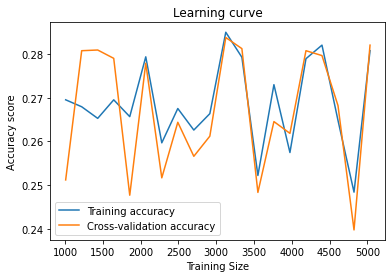

In [37]:
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=44)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [91]:
# learning curve considering different seeds

In [38]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

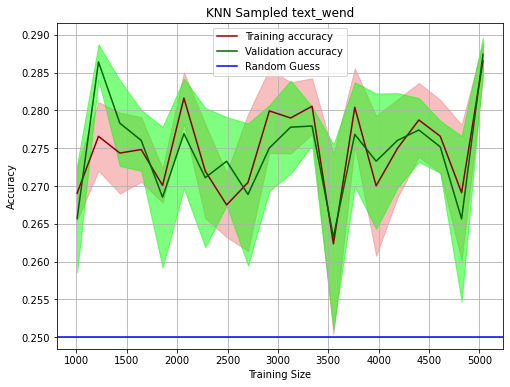

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Sampled text_wend')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Accuracy of validation curve is constant throughout all training sizes. It seems like they the algorithm does not learn anything.

# Random Forest

## Seed 100

In [40]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [41]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 14, 'min_samples_split': 14, 'n_estimators': 5}
Accuracy: 0.2887323943661972
F1 score micro: 0.2887323943661972

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       663
           1       0.29      0.70      0.41       694
           2       0.29      0.44      0.35       670
           3       0.00      0.00      0.00       671

    accuracy                           0.29      2698
   macro avg       0.14      0.28      0.19      2698
weighted avg       0.15      0.29      0.19      2698

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 5}
Accuracy: 0.27724240177909565
F1 score micro: 0.27724240177909565

classification report:
               precision    recall  f1-score   support

           0       0.27      0.68      0.39       663
           1       0.00      0.00      0.00       694
           2       0.29      0.44      0.35       670
           3       0.00      0.00      0.00       671

    accuracy                           0.28      2698
   macro avg       0.14      0.28      0.18      2698
weighted avg       0.14      0.28      0.18      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


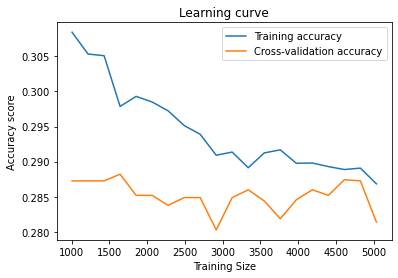

In [42]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=14, min_samples_split=14, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [43]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [44]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 26, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 26, 'n_estimators': 5}
Accuracy: 0.2720533728687917
F1 score micro: 0.2720533728687917

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       696
           1       0.25      0.68      0.36       628
           2       0.31      0.44      0.37       698
           3       0.00      0.00      0.00       676

    accuracy                           0.27      2698
   macro avg       0.14      0.28      0.18      2698
weighted avg       0.14      0.27      0.18      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


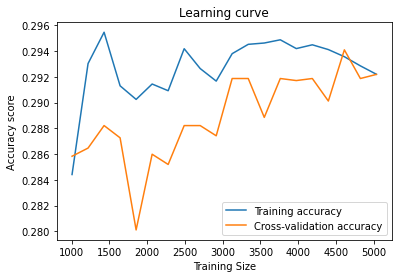

In [45]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=26, max_features='sqrt', min_samples_leaf=50, min_samples_split=26, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [46]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [47]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 26, 'min_samples_split': 14, 'n_estimators': 16}
Accuracy: 0.27390659747961454
F1 score micro: 0.27390659747961454

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       687
           1       0.27      0.69      0.39       671
           2       0.00      0.00      0.00       702
           3       0.27      0.44      0.34       638

    accuracy                           0.27      2698
   macro avg       0.14      0.28      0.18      2698
weighted avg       0.13      0.27      0.18      2698



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [1007 1219 1431 1643 1855 2067 2279 2491 2703 2915 3126 3339 3551 3763
 3975 4187 4399 4611 4823 5035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


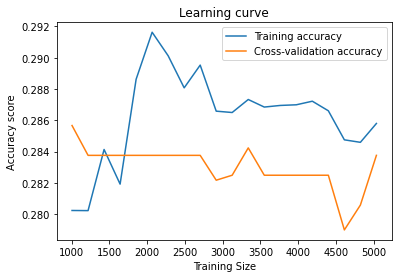

In [48]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='log2', min_samples_leaf=26, min_samples_split=14, n_estimators=16)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [103]:
# learning curve considering different seeds

In [49]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

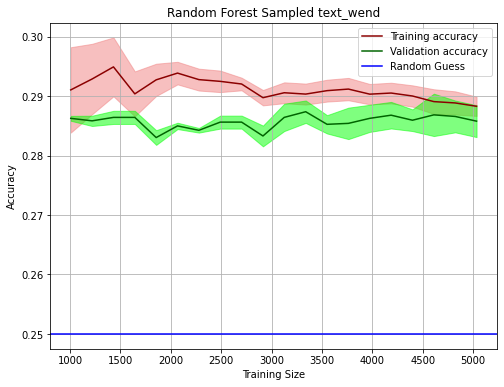

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Sampled text_wend')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Accuracy of validation curve is relatively constant throughout all training sizes. It seems like they the algorithm does not learn anything. It is obvious that machine learning models cannot predict the level depression and anxiety.